# Index


 <ul>
<b>1. Import Necessary Libraries</b>
</ul>
<ul>
<b>2. Read In and Explore the Data</b>
   <li> Imputing missing values </li>  <li> Deleting duplicate rows  </li>
</ul>

<ul>
<b>3. Exploratory Data Analysis Data Visualization</b><br>
    A.Univariate analysis
     <li>i.   Catplots- for categoical features</li>
     <li> ii.  PDFs and QQ-plots - for continues r.v</li>
      <li>iii. CDF</li>
      <li>iv.  Boxplot</li>
     <li> v.   Violinplot</li>
     <li> vi.  Inter Quantile range </li>
</ul>   
 
<ul>
<b>4. Data pre-processing and cleaning</b> <br>
  <li>  A.Removing outliers manually</li>
       using where clause on dataframes
   <li> B.Converting all features to numerical feature</li> 
  <li>  C.Removing Unwanted columns</li>
   <li> D.Removing outliers using standard methods
      using zscore</li>
  <li>  E. Train_test split</li>
   <li>  F. Scalling the Fetures using Standarscalar</li>
</ul>    

<ul>
<b>5. Building Models </b><br>
   <li>  A.KNN</li>
    <li> B.Linear Regression</li>
    <li> C.Logistic Regression</li>
   <li>   D.SVM</li>
    <li>  E.Decision Tree</li>
    <li>  F.Ensembles</li>
     <ul> i.  Bagging - Randomforest</ul>   
     <ul> ii. Boosting - GBDT</ul>
     <ul> iii.Stacking -Using SGDclassifier and Stackingclassifier in mlxtend</ul>
    <ul>  iv. Xgboost</ul>
    <li> G.Naive Bayes</li>
</ul>     

<ul>
<b>6. Model Comparison and finding best model</b><br>
 </ul>   
<ul>
<b>7. Creating Submission File with best model</b><br>
</ul>

# 1. Import Necessary Libraries

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [249]:
#converting into dataframe
df_train = pd.read_csv('train.csv')

In [250]:
df_train.shape

(891, 12)

In [251]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [252]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Imputing Missing Values with Medians

In [230]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [232]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)

### Summary:
1.Cabin has more than 70% missing values so its better to drop such feture instead of imputing it

In [233]:
df_train=df_train.drop(['Cabin'],axis=1)


### Filling Item_Age missing values with median

In [234]:
median_Age= df_train['Age'].median()
median_Age
df_train['Age']=df_train['Age'].fillna(value=median_Age)

In [235]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [236]:
median_eb= df_train['Embarked'].median()
median_eb
df_train['Embarked']=df_train['Embarked'].fillna(value=median_eb)

In [237]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [238]:
median_eb= df_train['Embarked'].median()
median_eb
df_train['Embarked']=df_train['Embarked'].fillna(value=median_eb)

# 3. Exploratory Data Analysis Data Visualization

## A.Univariate analysis

## i. Histograms /Categorical Plots

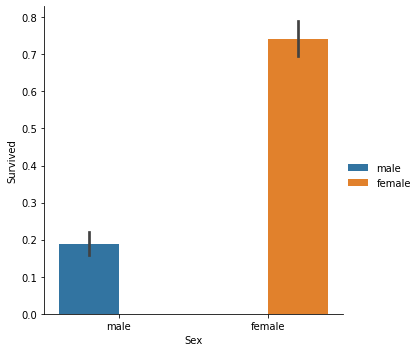

In [239]:
sns.catplot(x="Sex", y="Survived",hue="Sex", kind="bar", data=df_train)\
             .add_legend();

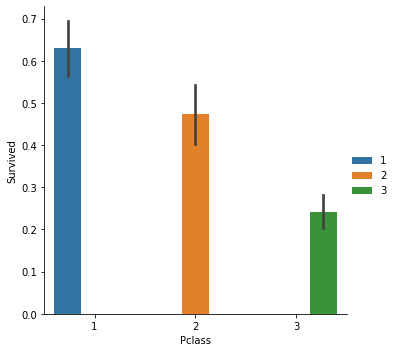

In [240]:
sns.catplot(x="Pclass", y="Survived",hue="Pclass", kind="bar", data=df_train)\
             .add_legend();

## ii.PDF : Only for continues r.v like age,fare

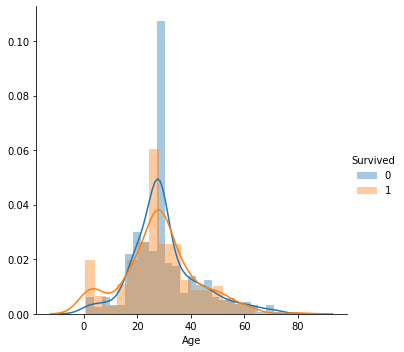

In [241]:
import seaborn as sb
sb.FacetGrid(df_train,hue='Survived',height=5)\
    .map(sb.distplot,'Age')\
    .add_legend();
plt.show()

In [242]:
df_train['Age'].mode()

0    28.0
dtype: float64

Summary:<br>
1.There are so many people within age group of 18-40 .<br>
2.28 years age people have survived the most .

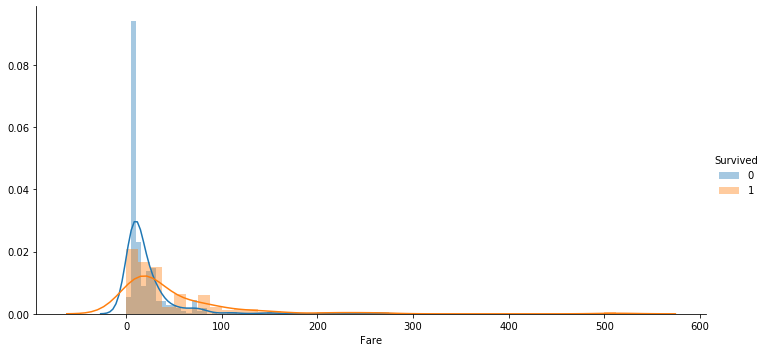

In [243]:
import seaborn as sb
sb.FacetGrid(df_train,hue='Survived',height=5,aspect=2)\
    .map(sb.distplot,'Fare')\
    .add_legend();
plt.show()

In [244]:
df_train['Fare'].median()

14.4542

Summary:<br>
The average fare is 14.45 but the data  is skewd hence we will apply transforms

removing skewness Using Log_tranformation

In [121]:
tranformed_fare = np.log(df_train['Fare'])
tranformed_fare.describe()

count    891.000000
mean           -inf
std             NaN
min            -inf
25%        2.068177
50%        2.670985
75%        3.433987
max        6.238967
Name: Fare, dtype: float64

removing skewness Using Standardscalr 

In [245]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train['Fare'].values.reshape(1,-1))
tranformed_f=scaler.transform(df_train['Fare'].values.reshape(1,-1))
df_train['Fare']=tranformed_f.transpose()

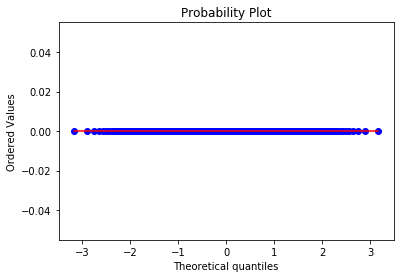

In [246]:
import pylab 
import scipy.stats as stats
stats.probplot(df_train['Fare'], dist="norm", plot=pylab)
pylab.show()

## Q-Q plot

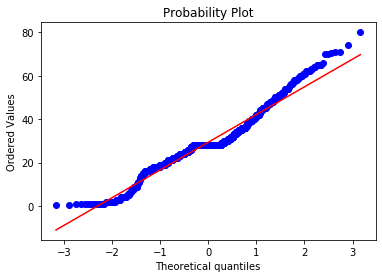

In [122]:
# we can check the distributin if whole data have continues rv but there are some categorical features which can't be distributed
import pylab 
import scipy.stats as stats
stats.probplot(df_train['Age'], dist="norm", plot=pylab)
pylab.show()

### fare before applying log transformation

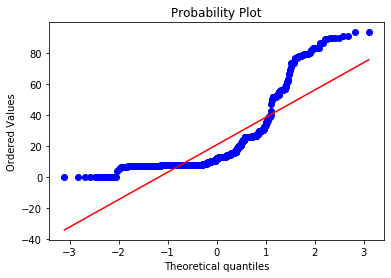

In [196]:
import pylab 
import scipy.stats as stats
stats.probplot(df_train['Fare'], dist="norm", plot=pylab)
pylab.show()

### fare after applying log tranform

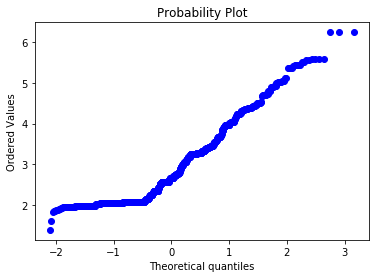

In [124]:
import pylab 
import scipy.stats as stats
stats.probplot(tranformed_fare, dist="norm", plot=pylab)
pylab.show()

## iii. CDF

[0.06060606 0.05162738 0.1986532  0.38832772 0.13243547 0.07856341
 0.05050505 0.02693603 0.01010101 0.00224467]
[ 0.42   8.378 16.336 24.294 32.252 40.21  48.168 56.126 64.084 72.042
 80.   ]


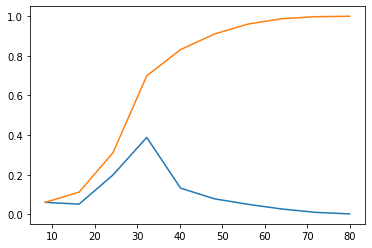

In [73]:
counts, bin_edges = np.histogram(df_train['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

Summary:<br>
80% of people below age 35 has survived or those who have age less than 35 has 80% chance of being survived

## iv. Boxplots

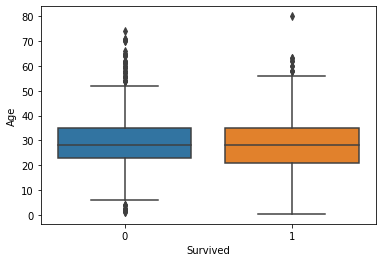

In [76]:
sb.boxplot(x='Survived',y='Age',data=df_train)
plt.show()

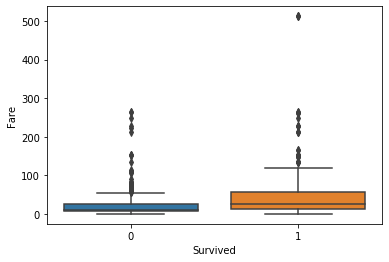

In [77]:
sb.boxplot(x='Survived',y='Fare',data=df_train)
plt.show()

Summary:<br>
We can see that there are outliers in data lets quantify the outliers using percentile value

# v. Violinplots

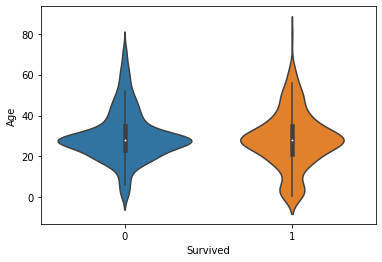

In [74]:
sb.violinplot(x='Survived',y='Age',data=df_train)
plt.show()

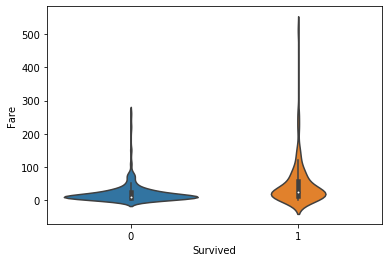

In [75]:
sb.violinplot(x='Survived',y='Fare',data=df_train)
plt.show()

## iv.Inter quantile range 

In [125]:
for i in range(0,101):
    print(i,np.round(np.percentile(df_train['Age'],i),3))

0 0.42
1 1.0
2 2.0
3 3.0
4 4.0
5 6.0
6 8.4
7 10.0
8 14.0
9 15.0
10 16.0
11 16.0
12 17.0
13 18.0
14 18.0
15 18.0
16 19.0
17 19.0
18 19.0
19 20.0
20 20.0
21 21.0
22 21.0
23 22.0
24 22.0
25 22.0
26 23.0
27 23.0
28 24.0
29 24.0
30 24.0
31 24.0
32 25.0
33 25.0
34 26.0
35 26.0
36 27.0
37 27.0
38 28.0
39 28.0
40 28.0
41 28.0
42 28.0
43 28.0
44 28.0
45 28.0
46 28.0
47 28.0
48 28.0
49 28.0
50 28.0
51 28.0
52 28.0
53 28.0
54 28.0
55 28.0
56 28.0
57 28.0
58 28.0
59 28.0
60 28.0
61 29.0
62 29.0
63 29.7
64 30.0
65 30.0
66 30.7
67 31.0
68 32.0
69 32.0
70 32.5
71 33.0
72 34.0
73 34.0
74 35.0
75 35.0
76 36.0
77 36.0
78 36.0
79 38.0
80 38.0
81 39.0
82 40.0
83 40.0
84 41.0
85 42.0
86 43.0
87 44.0
88 45.0
89 46.1
90 47.0
91 48.0
92 50.0
93 51.0
94 52.0
95 54.0
96 56.0
97 59.0
98 62.0
99 65.0
100 80.0


We can see there the change in percentile at 99 and 100 so there are outliers in data 

In [126]:
for i in range(0,101):
    print(i,np.round(np.percentile(df_train['Fare'],i),3))

0 0.0
1 0.0
2 6.398
3 6.975
4 7.053
5 7.225
6 7.225
7 7.229
8 7.25
9 7.25
10 7.55
11 7.729
12 7.75
13 7.75
14 7.75
15 7.75
16 7.775
17 7.775
18 7.796
19 7.854
20 7.854
21 7.896
22 7.896
23 7.896
24 7.896
25 7.91
26 7.925
27 7.956
28 8.05
29 8.05
30 8.05
31 8.05
32 8.1
33 8.613
34 8.662
35 9.0
36 9.5
37 9.588
38 10.47
39 10.5
40 10.5
41 11.133
42 12.22
43 12.51
44 13.0
45 13.0
46 13.0
47 13.0
48 13.083
49 14.011
50 14.454
51 14.5
52 15.246
53 15.5
54 15.85
55 16.1
56 17.88
57 19.258
58 20.22
59 21.0
60 21.679
61 23.225
62 24.15
63 25.551
64 26.0
65 26.0
66 26.0
67 26.25
68 26.308
69 26.55
70 27.0
71 27.75
72 28.942
73 29.7
74 30.328
75 31.0
76 31.388
77 33.656
78 35.5
79 39.0
80 39.688
81 46.9
82 49.901
83 52.0
84 53.1
85 56.496
86 57.392
87 65.48
88 69.55
89 73.5
90 77.958
91 79.2
92 82.171
93 88.323
94 93.5
95 112.079
96 133.99
97 151.55
98 211.338
99 249.006
100 512.329


# 4. Data pre-processing and cleaning

## A. Cleaning data Manually

In [127]:
temp=df_train[df_train['Age'] <= 65 ]
df_train=temp
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1.0


In [128]:
temp=df_train[df_train['Fare'] <= 250 ]
df_train=temp
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1.0


In [129]:
for i in range(99,101):
    print(i,np.round(np.percentile(df_train['Age'],i),3))
    print(i,np.round(np.percentile(df_train['Fare'],i),3))

99 62.0
99 211.338
100 65.0
100 247.521


#### Other way to remove outliers is zscore but it needs all fetures to be numerical

In [130]:
# If data has outliers then we can remove them by using zscore<br>
#from scipy import stats
#z=abs(stats.zscore(df_train))
#print(np.where(z>3))
#df_train=df_train[(z<3).all(axis=1)]

## B.Converting all features to numerical features 

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [131]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#df_train['Name']= label_encoder.fit_transform(df_train['Name']) 
df_train['Sex']= label_encoder.fit_transform(df_train['Sex']) 
df_train['Ticket']= label_encoder.fit_transform(df_train['Ticket']) 

## C.Removing Unwanted columns

In [132]:
# this are the unique text features which don't have any sentiment information as all the values are unique so droping it
del df_train['Name']
del df_train['Ticket']

In [138]:
del df_train['PassengerId']

## D.Removing outliers using standard methods

In [139]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df_train))
print(np.where(z>3))
df_train=df_train[(z<3).all(axis=1)]

(array([  7,   8,  22,  37,  51,  55,  55,  68,  75,  81, 120, 124, 131,
       132, 137, 147, 156, 162, 191, 205, 212, 222, 229, 230, 240, 273,
       274, 284, 289, 297, 300, 334, 335, 340, 348, 348, 351, 352, 367,
       375, 377, 393, 393, 394, 401, 406, 428, 440, 458, 459, 485, 487,
       489, 491, 492, 494, 500, 500, 529, 533, 541, 556, 561, 579, 579,
       586, 586, 603, 603, 604, 625, 636, 661, 684, 693, 693, 711, 715,
       728, 728, 744, 744, 751, 805], dtype=int64), array([4, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 6, 4, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4, 5, 5, 6, 6, 5, 4, 5, 5, 5, 6, 5,
       5, 5, 5, 4, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 4, 5, 4,
       5, 5, 6, 6, 5, 6, 4, 5, 5, 6, 5, 5, 5, 6, 4, 5, 5, 5], dtype=int64))


In [140]:
for i in range(99,101):
    print(i,np.round(np.percentile(df_train['Age'],i),3))
    print(i,np.round(np.percentile(df_train['Fare'],i),3))

99 62.0
99 89.704
100 65.0
100 93.5


Summary:<br>
1.we can see the previous iqr values and new iqr values 

### E .Train_test Split

In [141]:
y=df_train['Survived']
x=df_train.drop(['Survived'],axis=1)


In [142]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [143]:
round(X_train, 2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
111,3,0,14.5,1,0,14.45,2.0
677,3,0,18.0,0,0,9.84,1.0
448,3,0,5.0,2,1,19.26,2.0
525,3,1,40.5,0,0,7.75,3.0
829,1,0,62.0,0,0,80.00,1.0
...,...,...,...,...,...,...,...
91,3,1,20.0,0,0,7.85,1.0
131,3,1,20.0,0,0,7.05,1.0
336,1,1,29.0,1,0,66.60,1.0
530,2,0,2.0,1,1,26.00,1.0


### F.Normalizing all numerical features

In [148]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['Fare'].values.reshape(1,-1))
fare_tranformed = normalizer.transform(X_train['Fare'].values.reshape(1,-1))

In [149]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['Age'].values.reshape(1,-1))
Age_tranformed = normalizer.transform(X_train['Age'].values.reshape(1,-1))

In [153]:
X_train['Age']= Age_tranformed.transpose()
X_train['Fare']= fare_tranformed.transpose()

In [154]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
111,3,0,0.020306,1,0,0.022166,2.0
677,3,0,0.025207,0,0,0.015093,1.0
448,3,0,0.007002,2,1,0.029533,2.0
525,3,1,0.056716,0,0,0.011885,3.0
829,1,0,0.086825,0,0,0.122682,1.0
...,...,...,...,...,...,...,...
91,3,1,0.028008,0,0,0.012045,1.0
131,3,1,0.028008,0,0,0.010811,1.0
336,1,1,0.040612,1,0,0.102133,1.0
530,2,0,0.002801,1,1,0.039872,1.0


# Note: Important too check before applying models

### 1. Normalize/Scale the data before applying to distance based models like linear regression or logidtic reg.

### 2. As the data is slightly imbalance we need to use some other measure like AUC

In [51]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [52]:
# as this is a classificatoin task we cannot use MSE we can use Accuracy but it not works well with imbalane data so we use AUC-ROC

# first we need to calculate the tpr ,fpr , threshold values to draw the confusion matrix and AUC-ROC curve



# 5. Building Models

# Model1 : KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [156]:
clf.best_params_

{'n_neighbors': 21}

In [157]:
from sklearn.model_selection import cross_val_score
k_range = range(1,100,10)
k_scores = []


for k in k_range:
  
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.7272227891156462, 0.7775884353741498, 0.7782925170068027, 0.7822091836734695, 0.7925425170068027, 0.780295918367347, 0.7597585034013605, 0.7476343537414966, 0.7353435374149659, 0.7311394557823129]


Text(0, 0.5, 'Cross-Validated Accuracy')

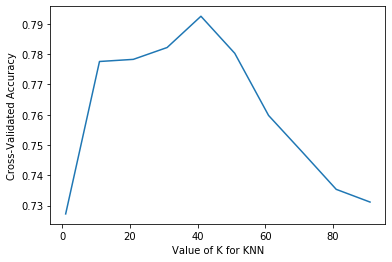

In [158]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

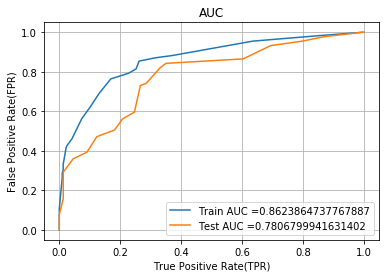

In [161]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict_proba(X_train)  
y_test_pred = neigh.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [162]:
y_pred=neigh.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       154
           1       0.58      0.60      0.59        89

    accuracy                           0.70       243
   macro avg       0.67      0.67      0.67       243
weighted avg       0.70      0.70      0.70       243

0.6954732510288066


## Confusion Matrix

In [163]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [164]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[100  54]
 [ 14  75]]


In [165]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

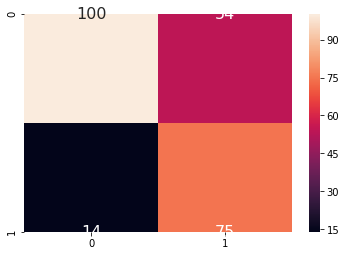

In [166]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 2 : Naive Bayes

In [167]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()

parameters = {'alpha': range(1,100,10)}

clf = GridSearchCV(mnb, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={'alpha': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [168]:
clf.best_params_

{'alpha': 41}

In [169]:
from sklearn.model_selection import cross_val_score
alpha = range(1,100,10)
k_scores = []


for k in alpha:
  
    mnb = MultinomialNB(alpha=k)
    
    scores = cross_val_score(mnb,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.7027244897959184, 0.7110170068027211, 0.7068503401360544, 0.7027670068027212, 0.6926037414965986, 0.6782755102040816, 0.662030612244898, 0.6621156462585034, 0.6621156462585035, 0.6559489795918367]


Text(0, 0.5, 'Cross-Validated Accuracy')

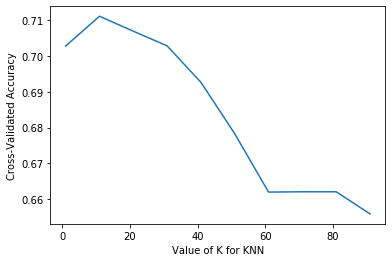

In [170]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(alpha, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

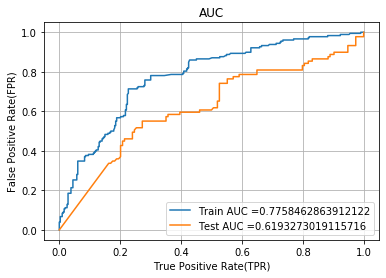

In [181]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=10)
mnb.fit(X_train, y_train)

y_train_pred = mnb.predict_proba(X_train)  
y_test_pred = mnb.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [182]:
y_pred=mnb.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           1       0.37      1.00      0.54        89

    accuracy                           0.37       243
   macro avg       0.18      0.50      0.27       243
weighted avg       0.13      0.37      0.20       243

0.3662551440329218


## Confusion Matrix

In [183]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [184]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[  0 154]
 [  0  89]]


In [185]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

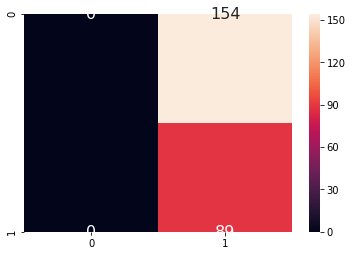

In [186]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Logistic Regression 

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8512671859855692


In [188]:
model.best_params_

{'C': 10000}

In [189]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    Lr = LogisticRegression(C=k)
    
    scores = cross_val_score(Lr,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.6374931972789115, 0.688561224489796, 0.7918724489795919, 0.78775, 0.783501700680272]


In [190]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

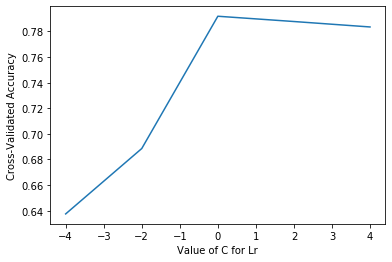

In [191]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

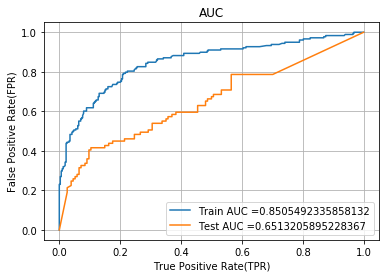

In [193]:
from sklearn.metrics import roc_curve, auc

Lr = LogisticRegression(C=1000)
Lr.fit(X_train, y_train)

y_train_pred = Lr.predict_proba(X_train)  
y_test_pred = Lr.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [79]:
y_pred=Lr.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       173
           1       0.78      0.74      0.76        98

    accuracy                           0.83       271
   macro avg       0.82      0.81      0.82       271
weighted avg       0.83      0.83      0.83       271

0.8339483394833949


## Confusion Matrix

In [80]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [81]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[165   8]
 [ 30  68]]


In [82]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

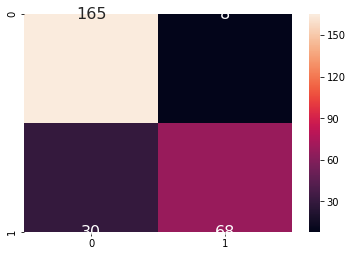

In [83]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Linear regression 

In [48]:
# we can't use linear regression as its a pure regression model 


# Model 4 : SVM

In [102]:
from sklearn.svm import SVC

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVC(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.9089456428905971


In [103]:
model.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [104]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVC(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.5956349206349205, 0.5956349206349205, 0.6669227994227993, 0.6614646464646465, 0.6942291967291967]


In [105]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

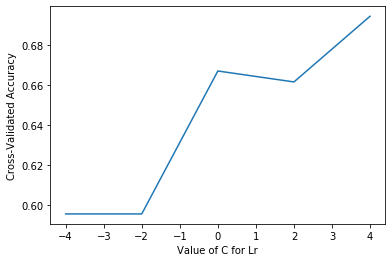

In [106]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

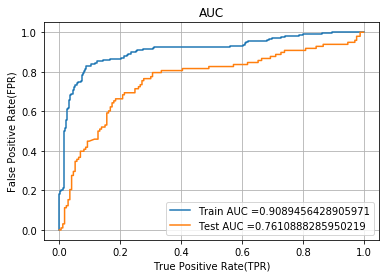

In [110]:
from sklearn.svm import SVC

svm = SVC(C=1000,gamma=0.0001,kernel= 'rbf',probability=True)

svm.fit(X_train, y_train)


y_train_pred = svm.predict_proba(X_train)  
y_test_pred = svm.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [111]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       173
           1       0.67      0.62      0.65        98

    accuracy                           0.75       271
   macro avg       0.73      0.72      0.73       271
weighted avg       0.75      0.75      0.75       271

0.7527675276752768


## Confusion Matrix

In [112]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [113]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[102  71]
 [ 18  80]]


In [114]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

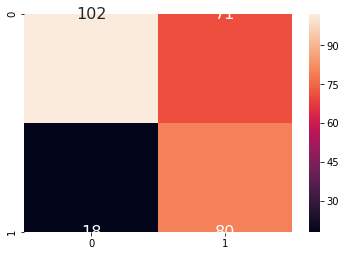

In [115]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 5 : Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
#min_samples_split :The minimum number of samples required to split an internal node, if less than this number can't split

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}

clf = DecisionTreeClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [134]:
model.best_params_

{'max_depth': 5, 'min_samples_split': 100}

In [118]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeClassifier(max_depth=k, min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.7759968734968735, 0.7924290524290524, 0.7906108706108707, 0.7906108706108707]


Text(0, 0.5, 'Cross-Validated Accuracy')

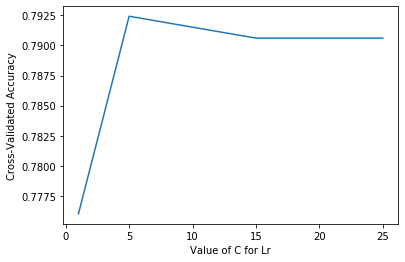

In [119]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

# Tried without hyperparameters

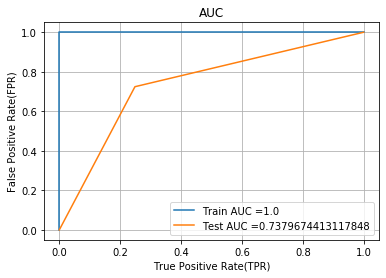

In [132]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

## Overfitting on train data as we are training very deep trees 

# Traning with best hyperparameters

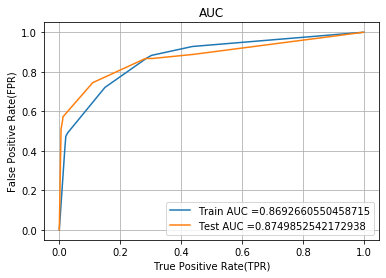

In [135]:
DT = DecisionTreeClassifier(max_depth=5,min_samples_split=100)

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [121]:
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       173
           1       0.79      0.74      0.77        98

    accuracy                           0.84       271
   macro avg       0.83      0.82      0.82       271
weighted avg       0.84      0.84      0.84       271

0.8376383763837638


## Confusion Matrix

In [122]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [123]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[97 76]
 [11 87]]


In [124]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

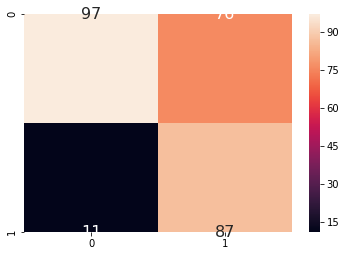

In [125]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

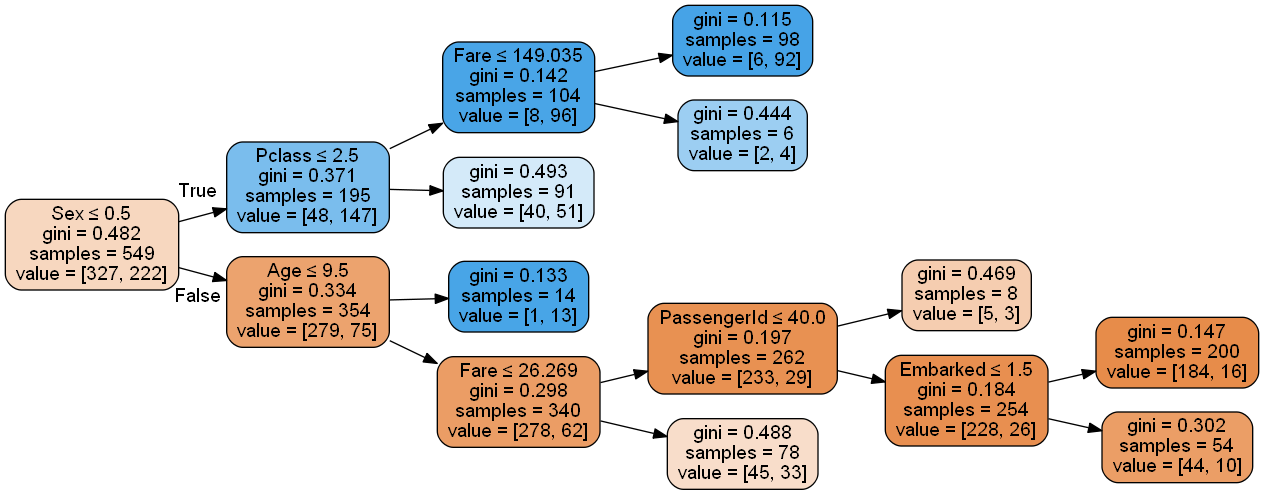

In [126]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(DT, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [136]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = RandomForestClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.91996583739703


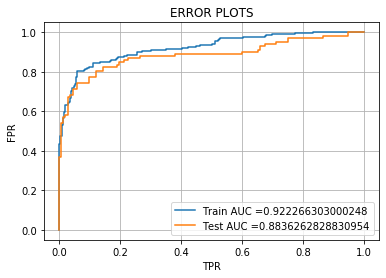

In [137]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(max_depth=5,n_estimators=100,class_weight='balanced')
RF.fit(X_train, y_train)


y_train_pred =  RF.predict_proba(X_train)[:,1]      
y_test_pred =  RF.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Classification Report

In [139]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       173
           1       0.74      0.83      0.78        98

    accuracy                           0.83       271
   macro avg       0.82      0.83      0.82       271
weighted avg       0.84      0.83      0.84       271

0.8339483394833949


## Confusion Matrix

In [140]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

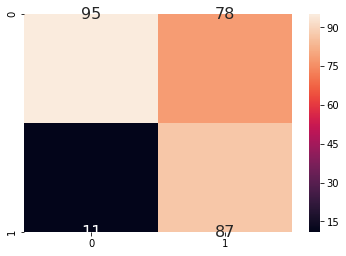

In [141]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Boosting

In [146]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.873894066297039


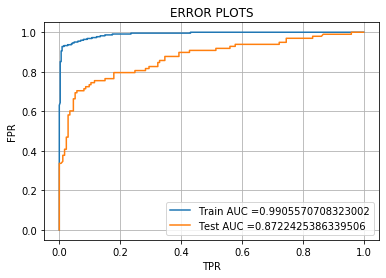

In [147]:
from sklearn.model_selection import GridSearchCV

GBDT=GradientBoostingClassifier(max_depth=5,n_estimators=50)
GBDT.fit(X_train, y_train)


y_train_pred =  GBDT.predict_proba(X_train)[:,1]      
y_test_pred =  GBDT.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [149]:
y_pred=GBDT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       173
           1       0.82      0.72      0.77        98

    accuracy                           0.84       271
   macro avg       0.83      0.82      0.82       271
weighted avg       0.84      0.84      0.84       271

0.8413284132841329


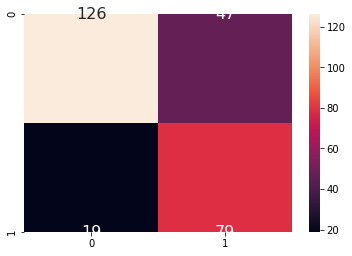

In [150]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Stacking

## Note: As we have very less data stascking is not advisable 

## Tried using SGDclassifier with different types of loss 

In [151]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [152]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(X_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_train, y_train)
#print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(X_train, y_train)
#print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(X_train, y_train)
#print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(X_test))))
    log_error =log_loss(y_test, sclf.predict_proba(X_test))
    if best_alpha > log_error:
        best_alpha = log_error

--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.691
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.678
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.647
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.595
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.561
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.555


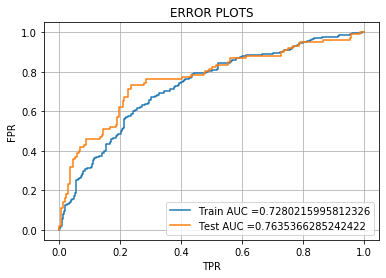

In [153]:
lr = LogisticRegression(C=10)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_train, y_train)


y_train_pred =  sclf.predict_proba(X_train)[:,1]      
y_test_pred =  sclf.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

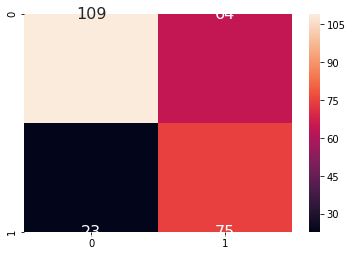

In [154]:
## Confusion Matrix

def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

[01:51:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


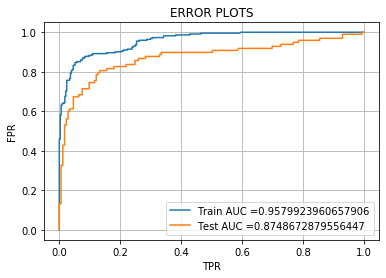

In [155]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_train_pred =  xgb_model.predict(X_train)      
y_test_pred =  xgb_model.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# 6.Model Comparison

In [161]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Sr.No","Model", "Accuracy", "AUC"]

#setting row values
table.add_row(['1',"KNN", '71.95','68.21' ])
table.add_row(['2',"Naive Bayes",'70.10' ,'72.18' ])
table.add_row(['3',"Logistic Regression", '83.39','86.07' ])
table.add_row(['4',"SVM", '75.27','76.10' ])
table.add_row(['5',"Decision Tree",'83.76' ,'87.49' ])
table.add_row(['6',"RandomForest",'84.50' ,'88.36' ])
table.add_row(['7',"GBDT",'84.13' ,'87.22' ])
table.add_row(['8',"Xgboost",'--' ,'76.53' ])
table.add_row(['9',"Stacking", '--','87.48' ])
print(table)

+-------+---------------------+----------+-------+
| Sr.No |        Model        | Accuracy |  AUC  |
+-------+---------------------+----------+-------+
|   1   |         KNN         |  71.95   | 68.21 |
|   2   |     Naive Bayes     |  70.10   | 72.18 |
|   3   | Logistic Regression |  83.39   | 86.07 |
|   4   |         SVM         |  75.27   | 76.10 |
|   5   |    Decision Tree    |  83.76   | 87.49 |
|   6   |     RandomForest    |  84.50   | 88.36 |
|   7   |         GBDT        |  84.13   | 87.22 |
|   8   |       Xgboost       |    --    | 76.53 |
|   9   |       Stacking      |    --    | 87.48 |
+-------+---------------------+----------+-------+


Summary:<br>
1.Randomforest is the best model amongst all with AUC of 88.36.<br>
2.As the data is imbalanced the accuracy score is affected.<br>
3.Ensembles like Xgboost ,staking , GBDT doesn't perform very well due to very amount of data

# 7.Creating Submission File

In [163]:
best_model=RF
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']